## Prelim Notes

https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations
    
    - Explanation of delay data

This link may provide a sanity check for making sure we've counted all the delays: 

https://www.bts.gov/topics/airline-time-tables

Deciding to go with data from this source: 
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [66]:
pd.options.display.max_columns = None

In [17]:
folder_name = "../flight_data/"
files = ['april', 'march', 'february', 'january', 'december', 'november']
for month in files: 
    print(f"{folder_name}{month}_2019")

../flight_data/april_2019
../flight_data/march_2019
../flight_data/february_2019
../flight_data/january_2019
../flight_data/december_2019
../flight_data/november_2019


In [34]:
def file_read_in(folder_name):
    combined = pd.DataFrame()
    files = ['april', 'march', 'february', 'january', 'december', 'november']
    for month in files: 
        data = pd.read_csv(f"{folder_name}{month}_2019.csv")
        combined = pd.concat([combined, data])
    return combined
        

In [54]:
df = file_read_in("../flight_data/")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [55]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 55
0,2019,2,4,30,2,2019-04-30,F9,20436,N711FR,2867,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2,4,30,2,2019-04-30,F9,20436,N711FR,2866,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2,4,30,2,2019-04-30,F9,20436,N712FR,1162,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2,4,30,2,2019-04-30,F9,20436,N712FR,108,...,0.0,2.0,0.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,2,4,30,2,2019-04-30,F9,20436,N713FR,420,...,0.0,62.0,0.0,27.0,0.0,0.0,618.0,8.0,8.0,NaN


In [58]:
AA = df.loc[(df.OP_UNIQUE_CARRIER == 'AA')]


In [76]:
pop = df.loc[(df.OP_UNIQUE_CARRIER != 'AA')]

In [ ]:
drop = ['TAIL_NUM',
        'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
        'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
        'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
        'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
        'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
        'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
        'DEP_TIME', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
        'WHEELS_ON', 'ARR_TIME', 'FIRST_DEP_TIME',
        'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'Unnamed: 55']

In [83]:
pop.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [85]:
#AA.info()
pop.OP_UNIQUE_CARRIER.value_counts()

WN    670877
DL    458572
OO    390376
UA    299902
YX    154967
MQ    152116
B6    148036
OH    138891
AS    124215
9E    122099
YV    108913
NK     92235
EV     77039
F9     57916
G4     48890
HA     40680
Name: OP_UNIQUE_CARRIER, dtype: int64

In [56]:
df.groupby([df.OP_UNIQUE_CARRIER]).nunique()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 55
OP_UNIQUE_CARRIER,,,,,,,,,,,,,,,,,,,,,
9E,2,3,6,31,7,181,1,1,154,759,...,2,419,292,307,15,374,581,135,133,0
AA,2,3,6,31,7,181,1,1,965,2517,...,2,733,346,361,74,565,1047,178,174,0
AS,2,3,6,31,7,181,1,1,234,1402,...,2,311,200,266,46,311,781,126,123,0
B6,2,3,6,31,7,181,1,1,298,1126,...,2,516,213,364,59,452,781,143,139,0
DL,2,3,6,31,7,181,1,1,897,2629,...,2,724,509,458,43,452,960,169,165,0
EV,2,3,6,31,7,181,1,1,140,645,...,2,461,214,425,1,331,408,110,110,0
F9,2,3,6,31,7,181,1,1,88,1318,...,2,327,101,187,1,381,353,90,89,0
G4,2,3,6,31,7,181,1,1,104,1256,...,2,363,174,173,41,310,260,77,76,0
HA,2,3,6,31,7,181,1,1,61,423,...,2,198,66,38,36,144,139,49,49,0


In [53]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'LONGEST

In [57]:
df.OP_UNIQUE_CARRIER.value_counts()

WN    670877
DL    458572
AA    455553
OO    390376
UA    299902
YX    154967
MQ    152116
B6    148036
OH    138891
AS    124215
9E    122099
YV    108913
NK     92235
EV     77039
F9     57916
G4     48890
HA     40680
Name: OP_UNIQUE_CARRIER, dtype: int64

## Checking out distributions of raw data

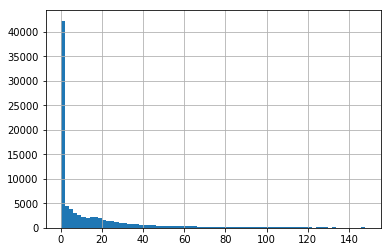

In [75]:
AA.CARRIER_DELAY.hist(bins = range(0,150, 2))

##  Histogram of carrier delays (minutes) for American Airlines.

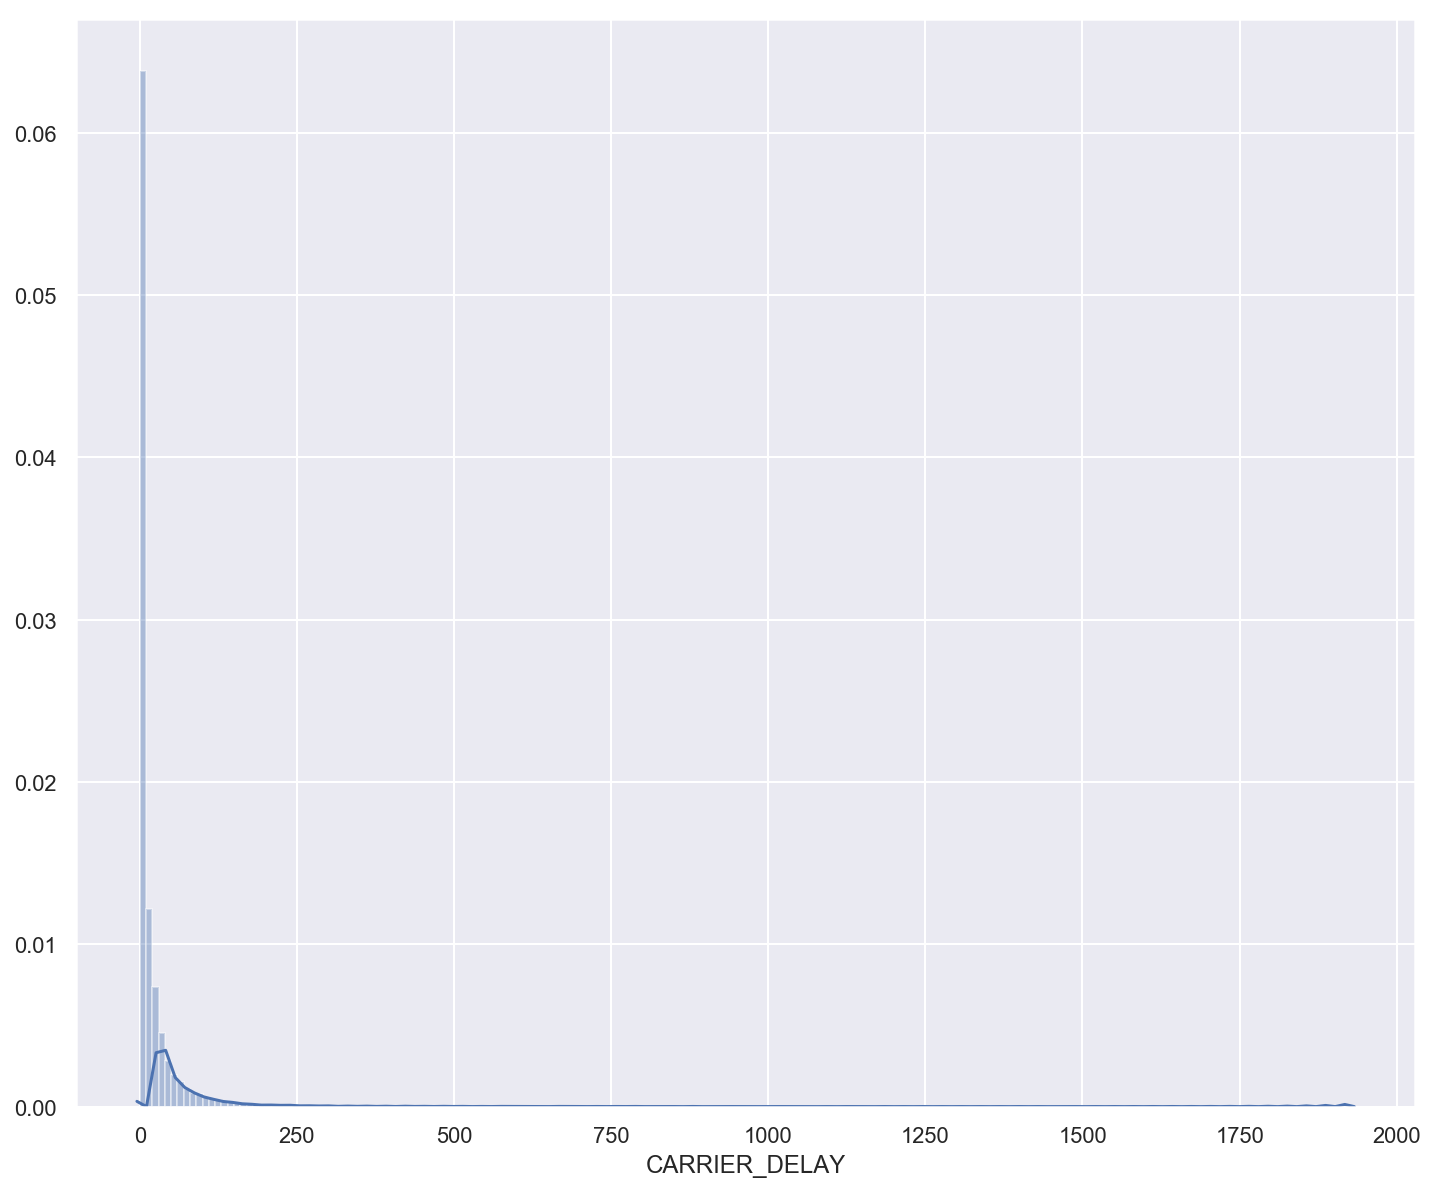

In [97]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(AA.CARRIER_DELAY.loc[AA.ARR_DEL15 == 1], bins = range(0,250, 10))

## Think I need to get rid of zero-values and answer the question: "When there IS a carrier delay, is AA mean C.D.T greater than the population's?"

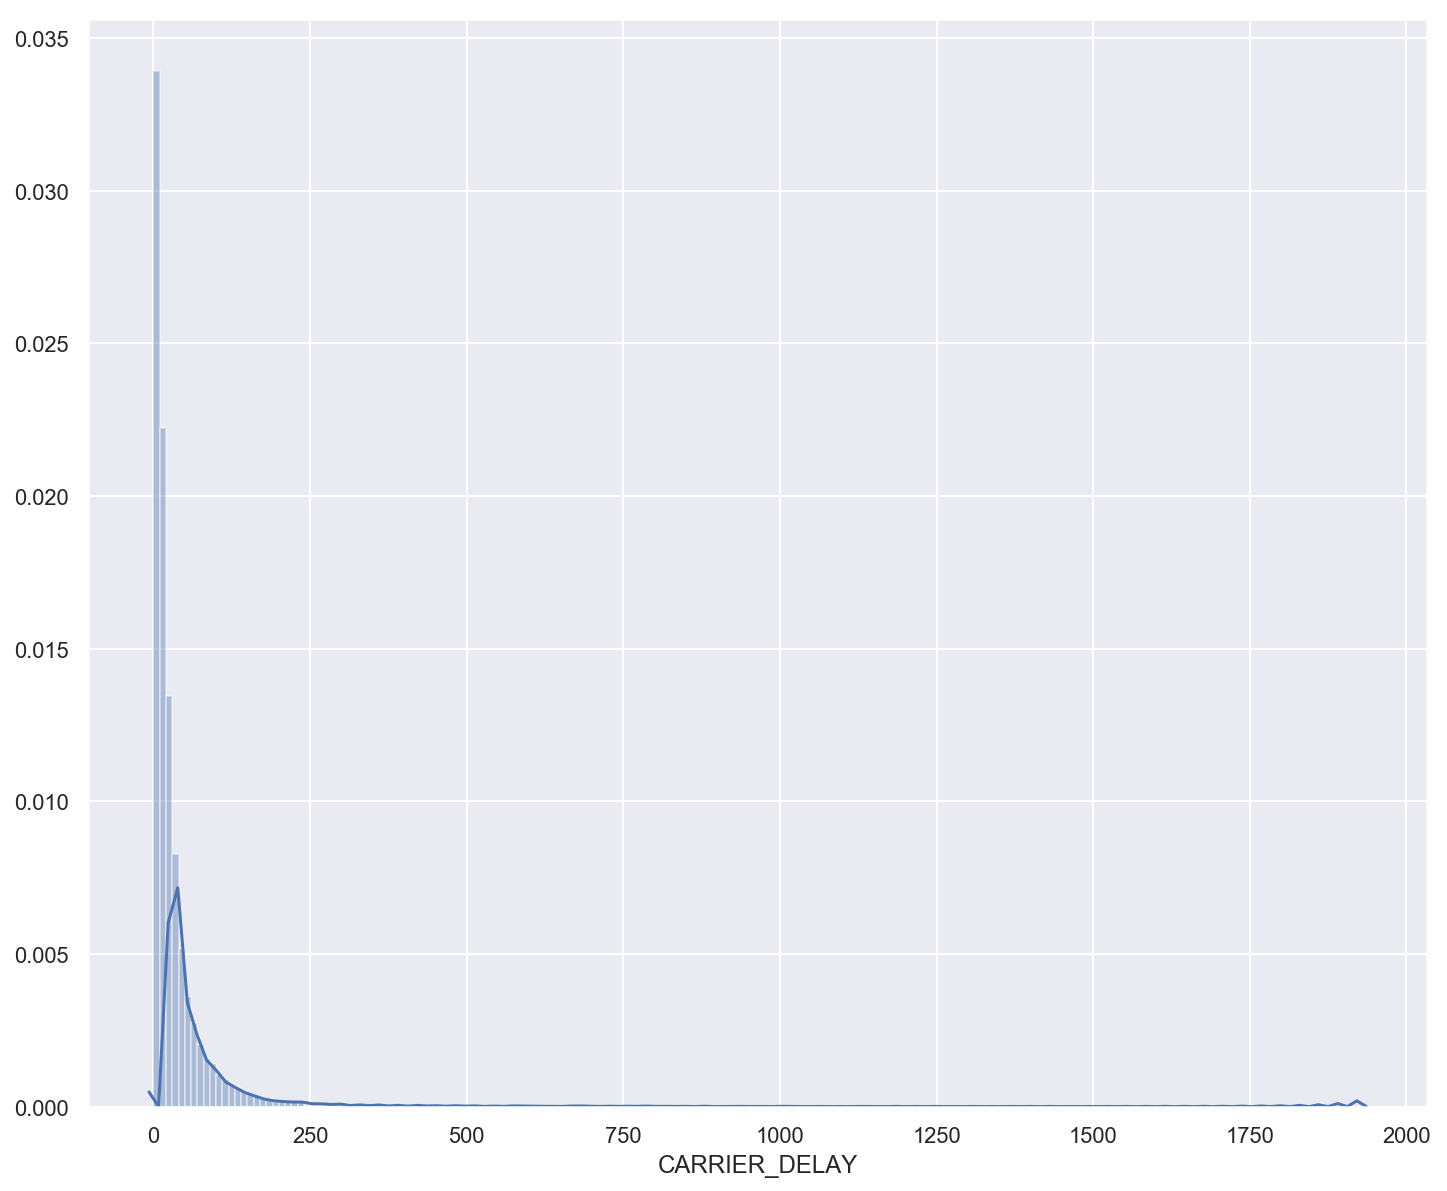

In [99]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(AA.CARRIER_DELAY.loc[(AA.ARR_DEL15 == 1) & (AA.CARRIER_DELAY != 0)], bins = range(0,250, 10))

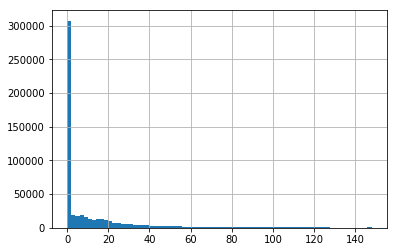

In [84]:
pop.CARRIER_DELAY.hist(bins = range(0,150, 2))

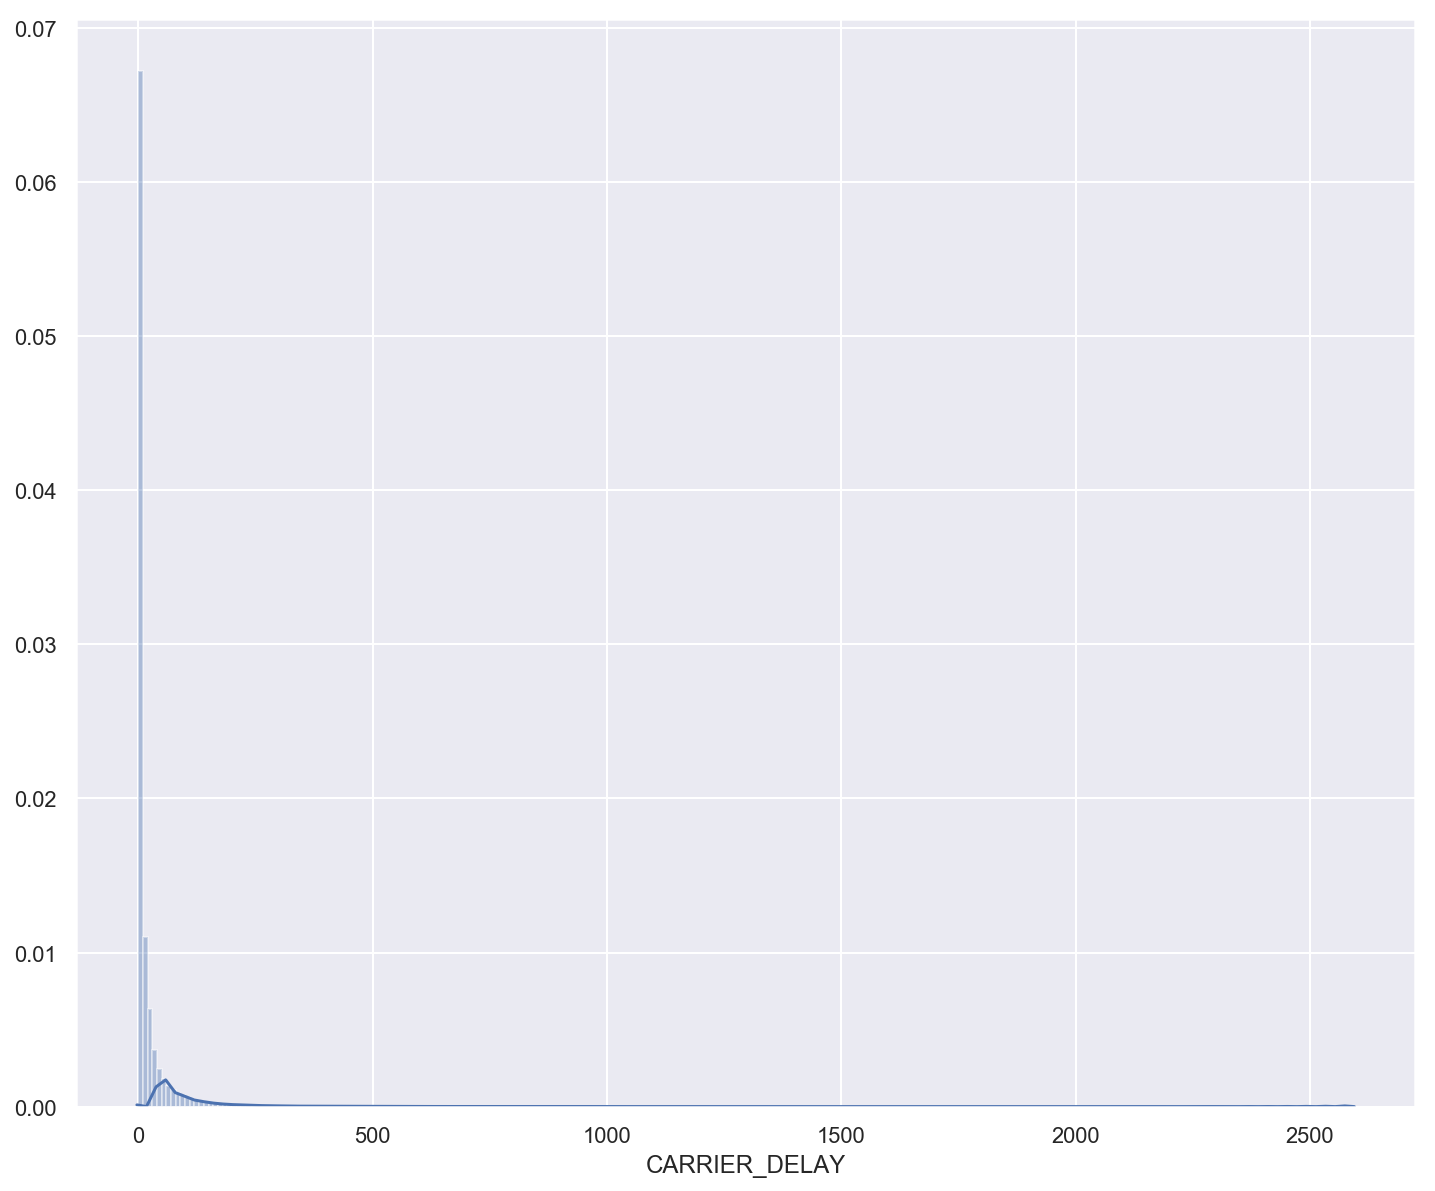

In [98]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop.CARRIER_DELAY.loc[pop.ARR_DEL15 == 1], bins = range(0,250, 10))

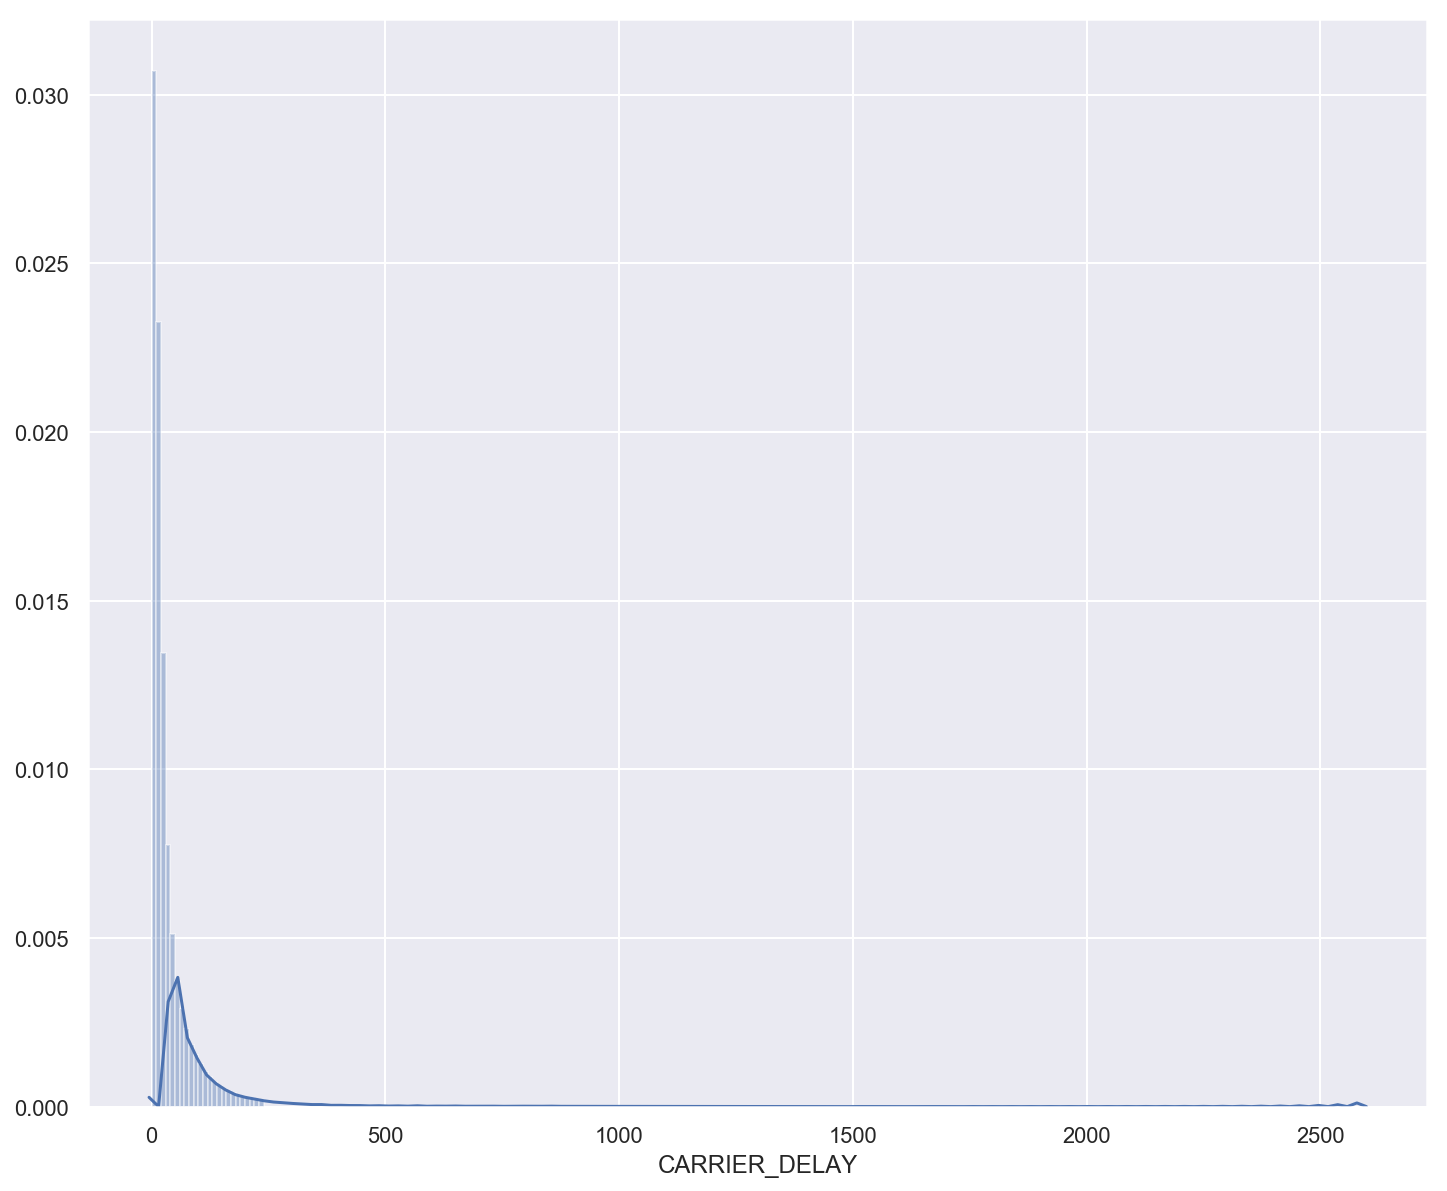

In [100]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop.CARRIER_DELAY.loc[(pop.ARR_DEL15 == 1) & (pop.CARRIER_DELAY != 0)], bins = range(0,250, 10))

In [ ]:
## Need to look into proportions t-test for comparing frequency of carrier delays between AA and Pop
## Need to look into ANOVA for comparing distribution of carrier delay times between AA and Pop

Looking a distribution of AA sample and total carrier population it doesn't appear to have a normal distribution. I believe we should use Welch's t-test to compare the means of the sample and population - specifically whether or not AA's avg carrier delay time is greater than the population's.

### Welch's t-Test

Recall that Welch's t-Test is given by  

# $ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$

where $\bar{X_i}$ , $s_i$, and $N_i$ are the sample mean, sample variance, and sample size, respectively, for sample i.

Write a function for calculatying Welch's t-statistic using two samples a, and b. To help, 2 potential samples are defined below.

> **Important Note**: While the formula does not indicate it, it is appropriate to take the absolute value of the t-value.

In [104]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)


In [101]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


In [117]:
AA_C_Delays = AA.CARRIER_DELAY.loc[(AA.ARR_DEL15 == 1) & (AA.CARRIER_DELAY != 0)]
pop_C_Delays = pop.CARRIER_DELAY.loc[(pop.ARR_DEL15 == 1) & (pop.CARRIER_DELAY != 0)]

In [105]:
welch_t(AA_C_Delays, pop_C_Delays)

## Perhaps this result isn't meaningful because this test assumes a normal distribution, which we have not observed for this dataset.

11.109183455896684

In [103]:
welch_df(AA_C_Delays, pop_C_Delays)

68636.84369916336

In [106]:
t = welch_t(AA_C_Delays, pop_C_Delays)
dof = welch_df(AA_C_Delays, pop_C_Delays)

In [108]:
p = 1 - stats.t.cdf(t, dof)
print(p)

0.0


In [120]:
AA_C_Delays_df = pd.DataFrame(AA_C_Delays)

## Making stuff Logarithmic!!

In [121]:
## Since data is right-skewed, results of ANOVA (and related tests) may not be useful for data 'as-is' - going to
## transform to log-scale
AA_C_Delays_df['lognorm'] = np.log(AA_C_Delays_df.CARRIER_DELAY)
AA_C_Delays_df.head()

,CARRIER_DELAY,lognorm
147434,32.0,3.465736
147444,2.0,0.693147
147460,18.0,2.890372
147473,8.0,2.079442
147479,23.0,3.135494


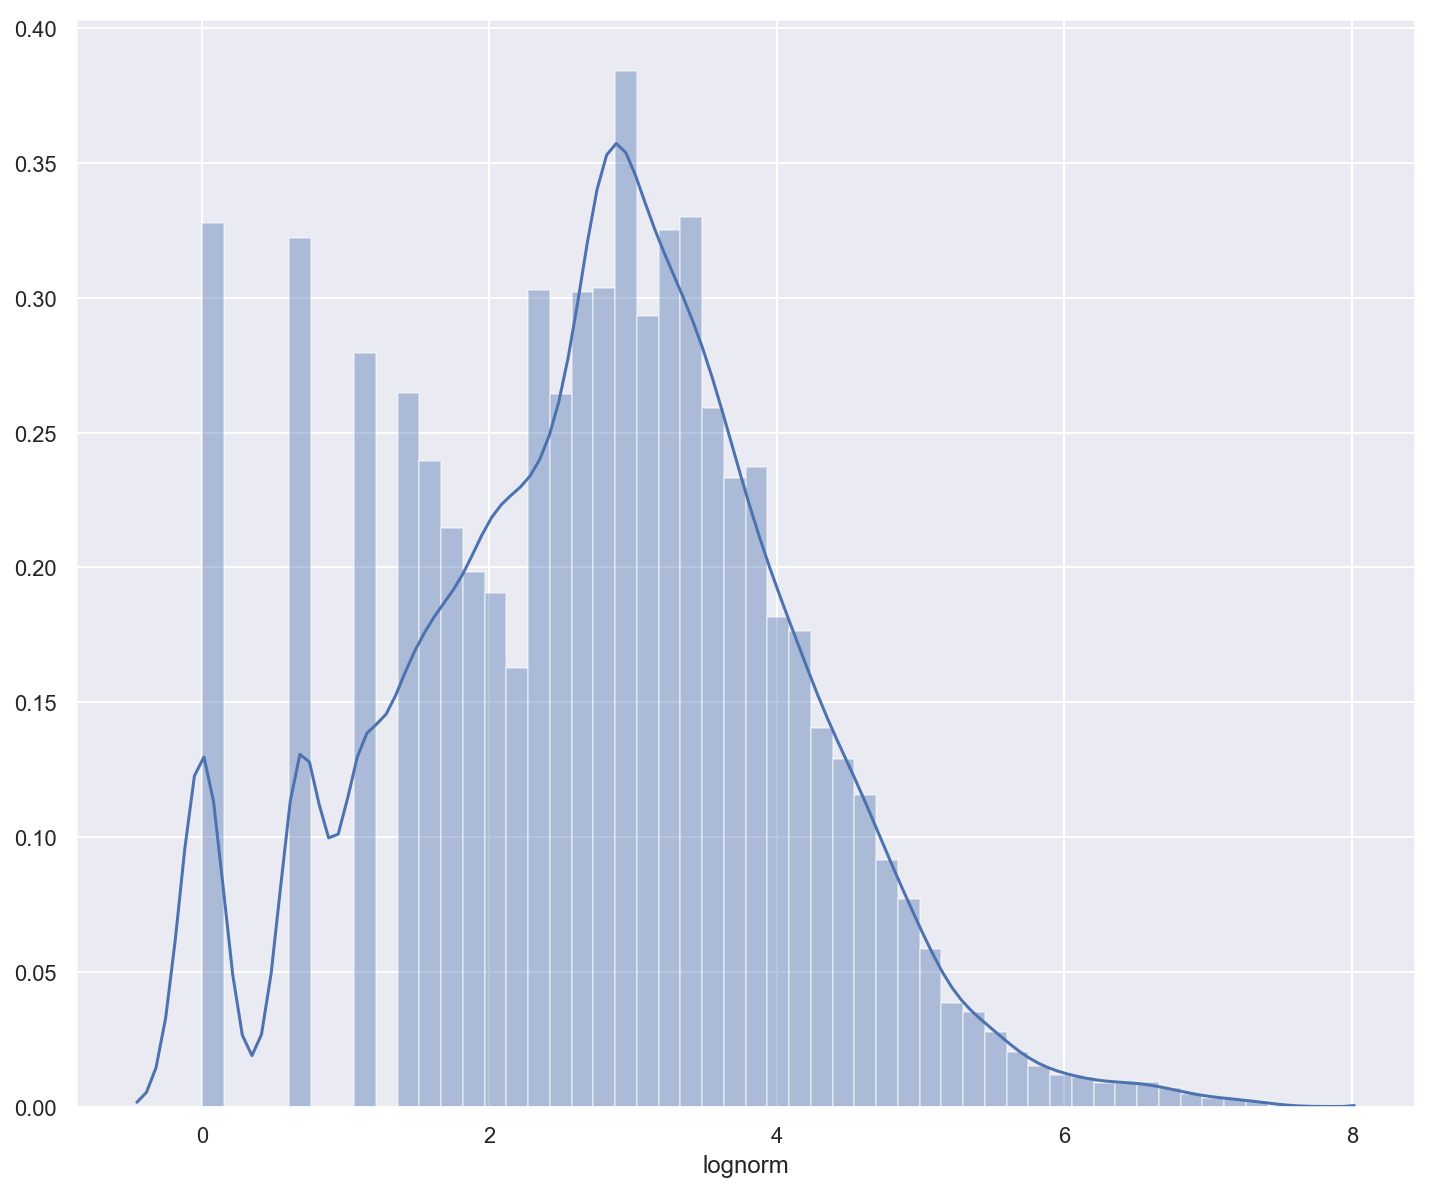

In [122]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(AA_C_Delays_df.lognorm)

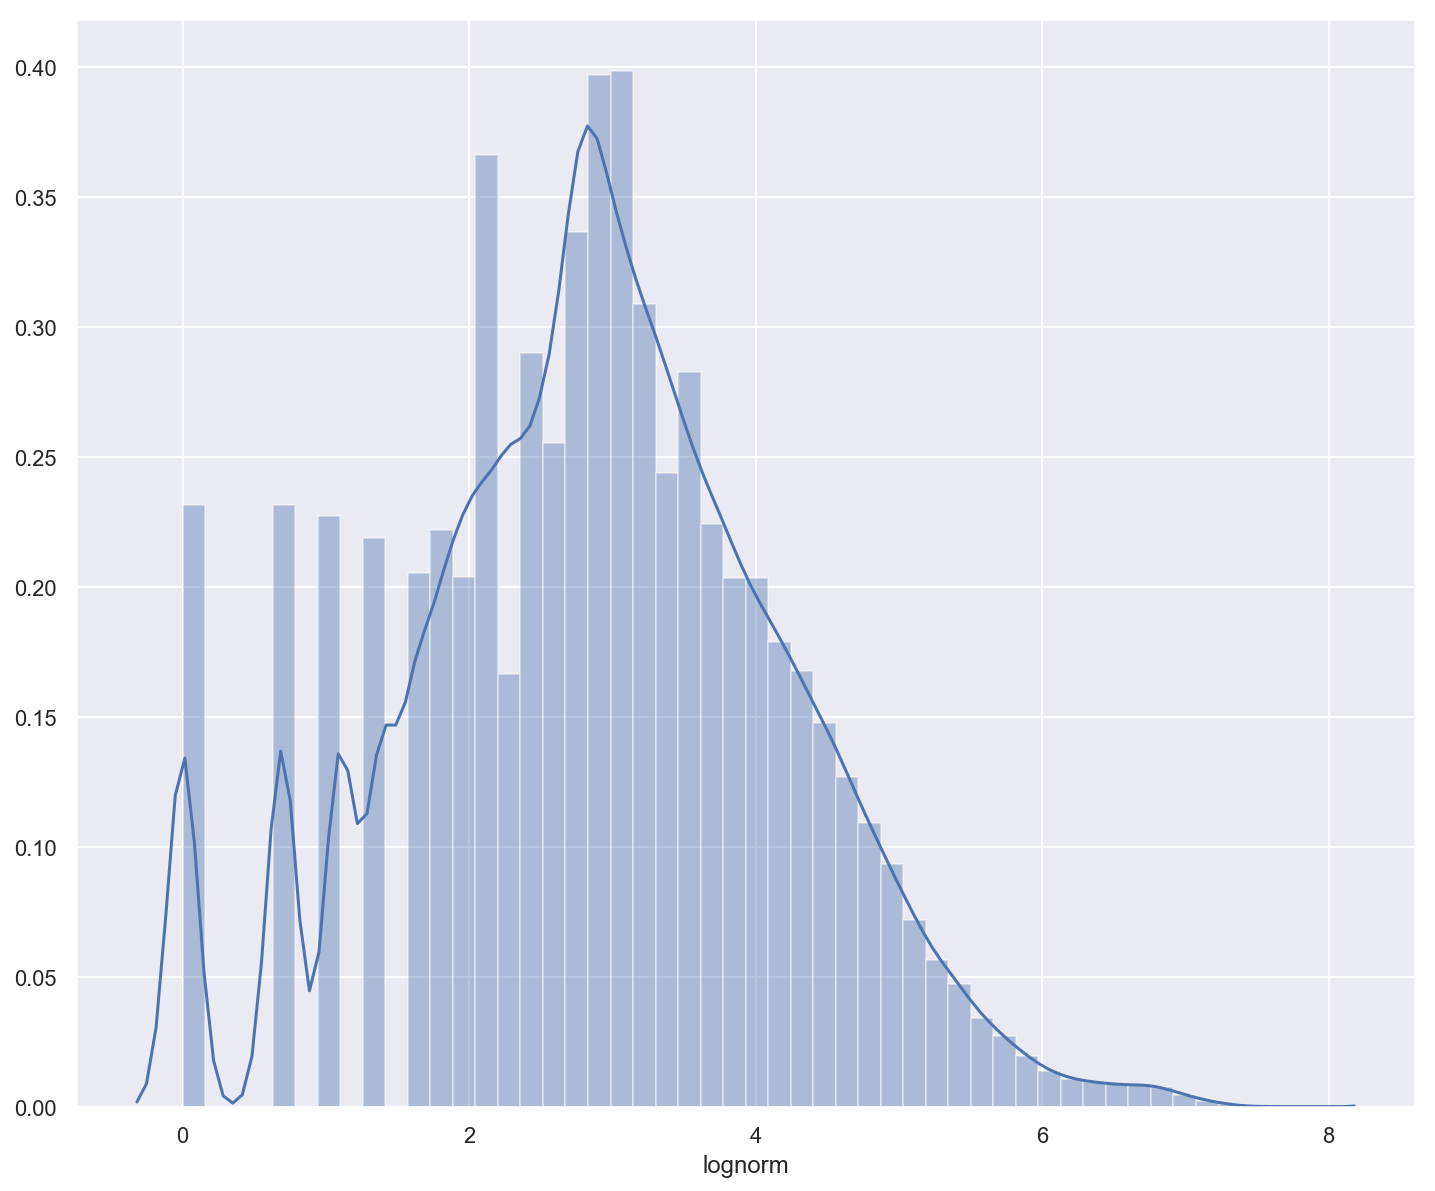

In [123]:
pop_C_Delays_df = pd.DataFrame(pop_C_Delays)
pop_C_Delays_df['lognorm'] = np.log(pop_C_Delays_df.CARRIER_DELAY)

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(pop_C_Delays_df.lognorm)

In [126]:
t_log = welch_t(AA_C_Delays_df['lognorm'], pop_C_Delays_df['lognorm'])

In [127]:
dof_log = welch_df(AA_C_Delays_df['lognorm'], pop_C_Delays_df['lognorm'])

In [129]:
p = 1 - stats.t.cdf(t_log, dof_log)
print(p)

0.0


## Resampling Time! 

In [ ]:
## After conversations with classmates, we've learned that for the Welch's t-test, we should apply a resampling method 

## Going to use the central limit theorem applied to non-zero carrier delays - to quantify difference in length of delay
## Hypothesis read as: "Given there is a carrier delay, is average carrier delay time greater for AA compared to the 16 other airlines"
## The subsetted data frames to use: "AA_C_Delays_df" & "pop_C_Delays_df"

In [134]:
def central_limit_theorem_plotter(distribution, sample_size, num_samples):
    sample_means = np.zeros(num_samples)
    pop_std = distribution.std()
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=50, kde=True)
    title = 'Sample Distribution n = {} and number of samples = {}, std error = {}'.format(
        sample_size, num_samples, pop_std/num_samples)
    print('mean = {}'.format(sample_means.mean()))
    plt.title(title)

mean = 38.20324308


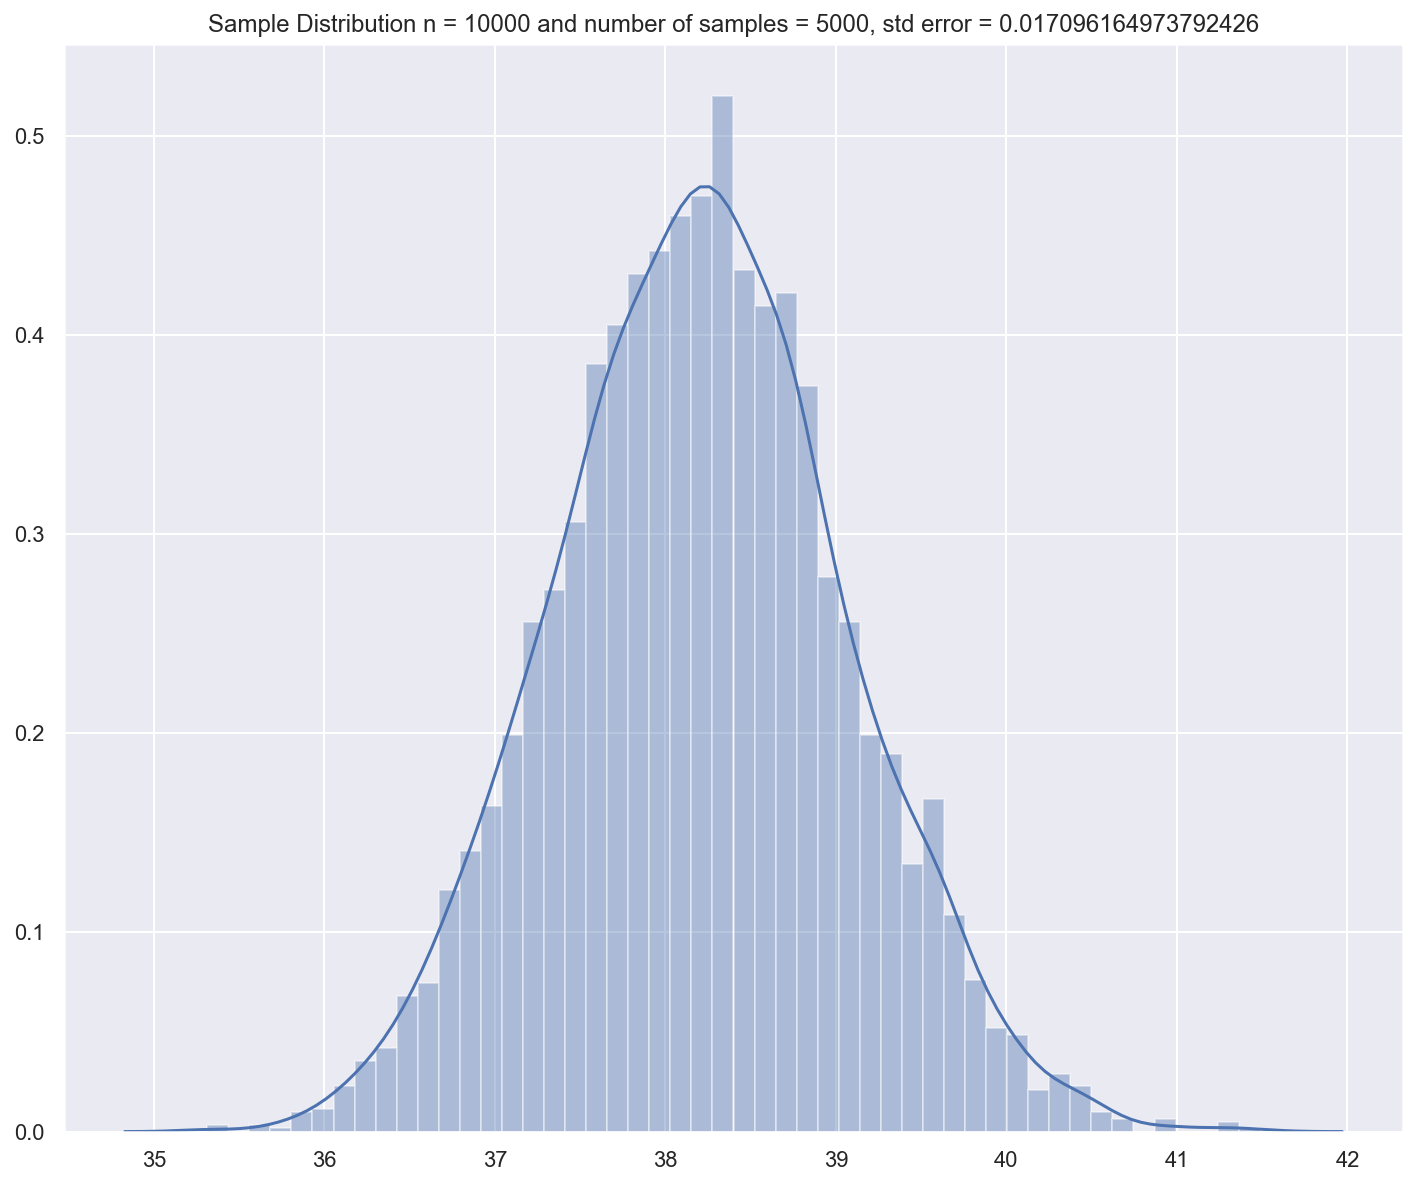

In [143]:
central_limit_theorem_plotter(AA_C_Delays_df.CARRIER_DELAY, 10000, 5000)

mean = 42.87256816


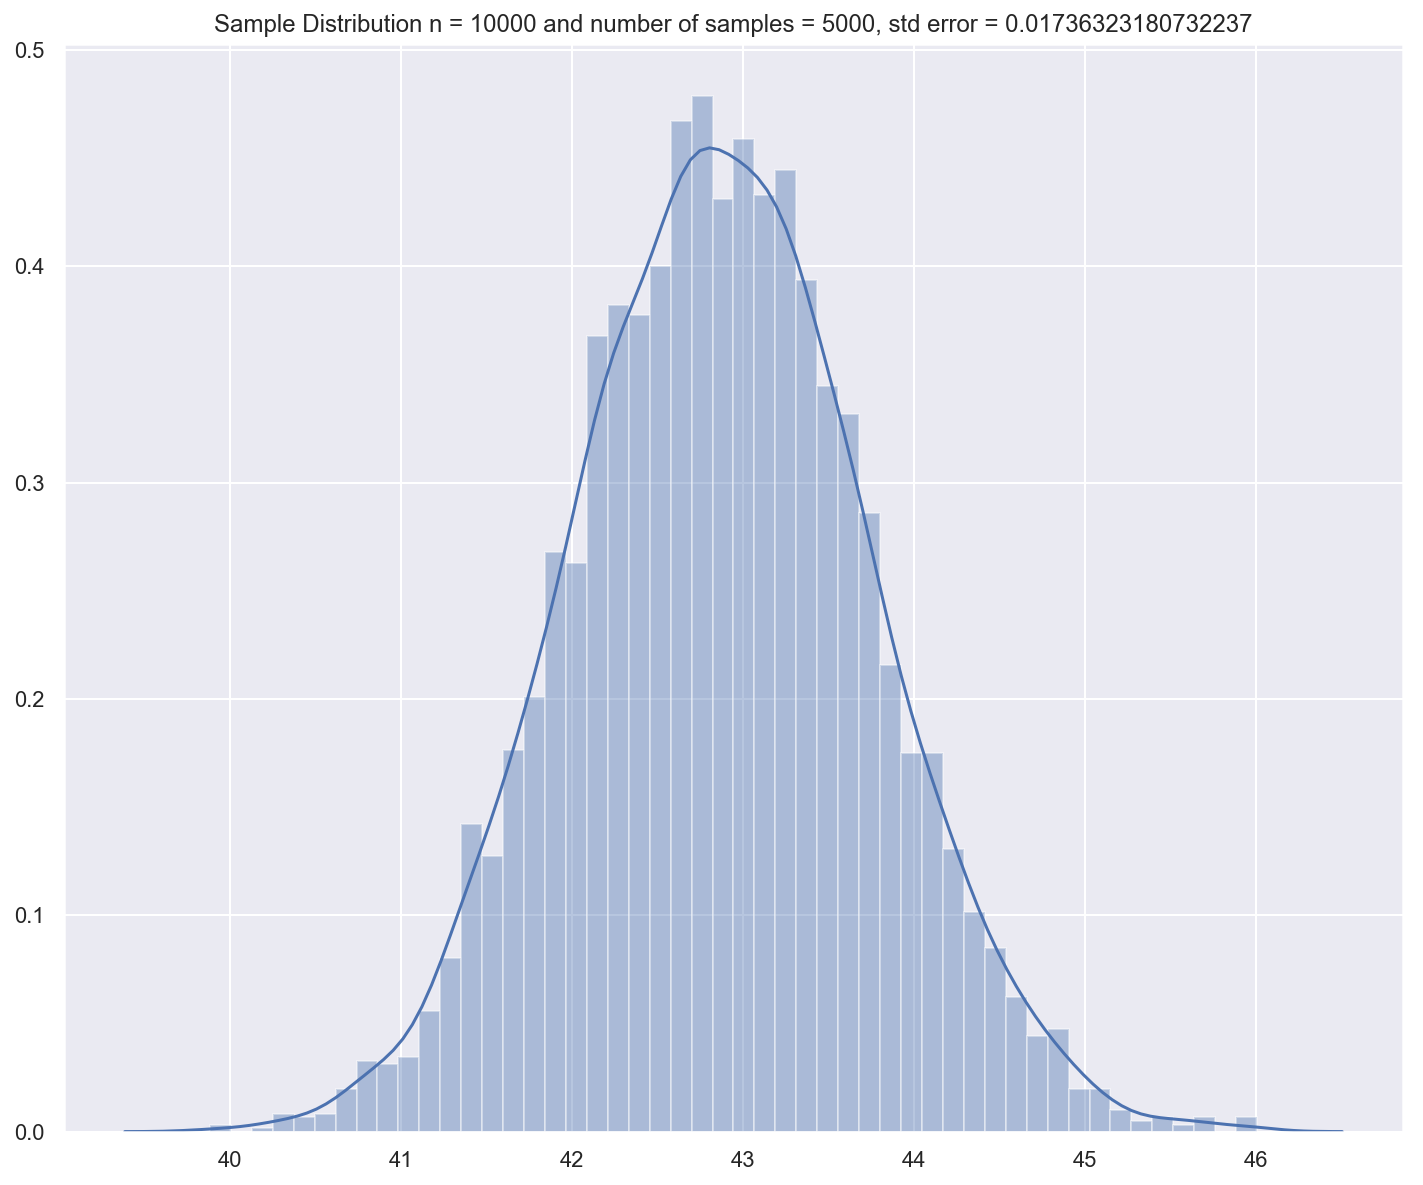

In [145]:
central_limit_theorem_plotter(pop_C_Delays_df.CARRIER_DELAY, 10000, 5000)